In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('car.csv')
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [3]:
df.Year.unique()#how many years are present in dataset

array([1991, 1999, 2003, 2007, 2011, 2016, 1997, 2006, 2012, 1994, 2008,
       2001, 2013, 1998, 2010, 1989, 2009, 1996, 2014, 2000, 2004, 1987,
       1990, 2005, 1995, 2002, 2015, 1992, 1988, 1986, 1980, 1979, 1985,
       1993, 1969, 1984, 1978, 1983, 1982], dtype=int64)

In [4]:
df.Brand.unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [5]:
df.Model.value_counts#total models 320

<bound method IndexOpsMixin.value_counts of 0                     320
1            Sprinter 212
2                   S 500
3                      Q7
4                   Rav 4
              ...        
4340                S 350
4341                  535
4342                  520
4343              Corolla
4344    T5 (Transporter) 
Name: Model, Length: 4345, dtype: object>

In [6]:
df.drop('Model',axis=1,inplace=True)#deleting the coloumn model
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


In [9]:
#checking if there is a null value
df.isnull().sum()#this will tell how many null values we have in each column

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 271.7+ KB


In [11]:
df.isnull().sum()#now there will be no null values

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [12]:
df.shape

(4345, 8)

<AxesSubplot:xlabel='Price'>

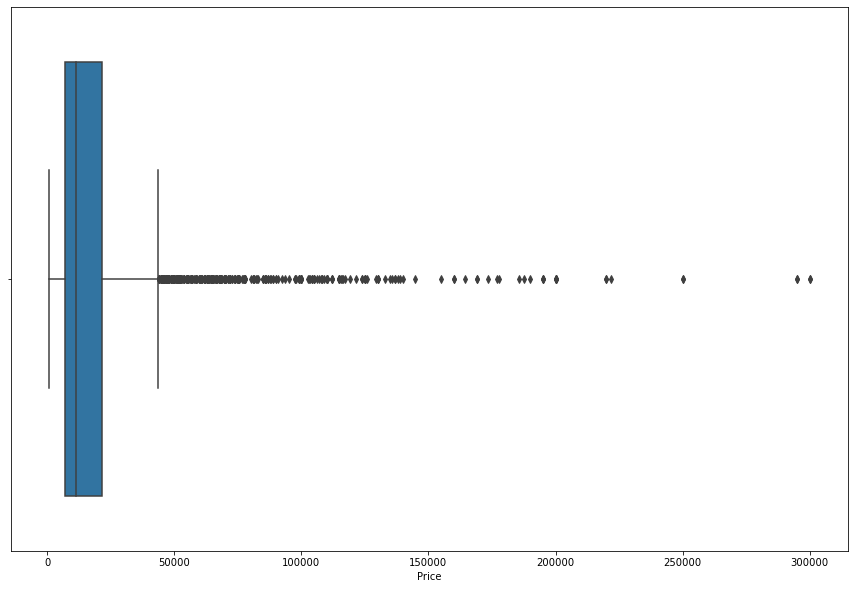

In [13]:
#identifying the outliers using box plot
#visvulaize the data 
#values above 50000 are outliers for eg no car can have value of 3lakh dollars
plt.figure(figsize=(15,10))
sns.boxplot(x=df.Price)

In [14]:
#removing the outliers using interquartile range(the data which lie in between 25% to 75%)
#iqr=q3(75percentile)-q1(25percentile)
df['Price'].describe()
#this means values above 21900 are outliers and values below 6999 are outliers

count      4173.000000
mean      19418.746935
std       25584.242620
min         600.000000
25%        6999.000000
50%       11500.000000
75%       21700.000000
max      300000.000000
Name: Price, dtype: float64

In [15]:
Price_q1=df.Price.quantile(.25)
Price_q1#finding 25 percentile

6999.0

In [16]:
Price_q3=df.Price.quantile(.75)
Price_q3#finding 75 percentile

21700.0

In [17]:
#finding out interquartile range
Price_iqr=Price_q3-Price_q1
Price_iqr

14701.0

In [18]:
#calculating the lower and upeer limit
price_lower_limit=Price_q1-1.5*Price_iqr#fixed formula
price_upper_limit=Price_q3+1.5*Price_iqr#fixed formula
price_lower_limit,price_upper_limit#lower limit is negetive because the minimum value is only the lower limit

(-15052.5, 43751.5)

In [19]:
df.Price.min()#this can be considered in case of car 600 dollars

600.0

In [20]:
new_df=df[(df.Price>price_lower_limit) & (df.Price<price_upper_limit)]#selecting rows who have price greater than lower limit and less than upper limit

new_df.shape


(3803, 8)

<AxesSubplot:xlabel='Year'>

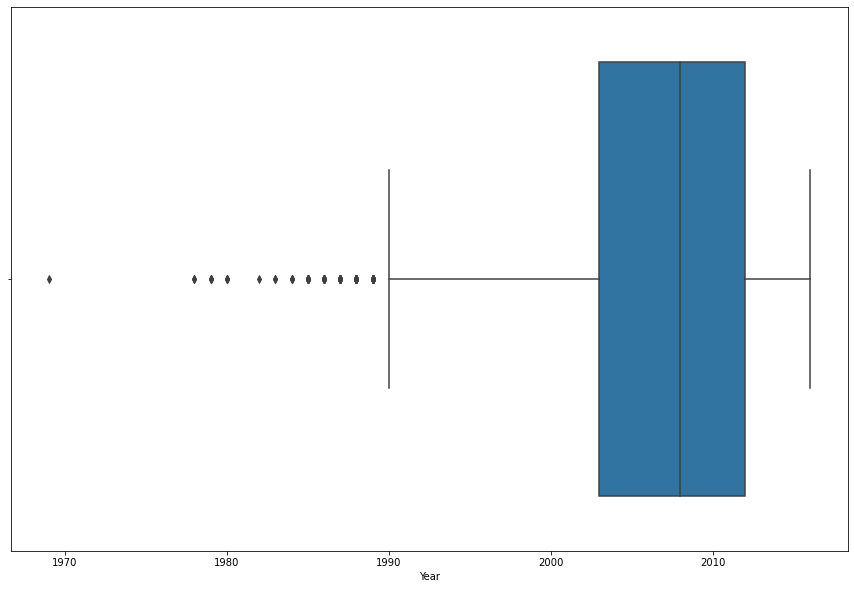

In [21]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df.Year)

In [22]:
new_df.Year.describe()

count    3803.000000
mean     2005.624244
std         6.509735
min      1969.000000
25%      2002.000000
50%      2007.000000
75%      2011.000000
max      2016.000000
Name: Year, dtype: float64

<AxesSubplot:xlabel='Year'>

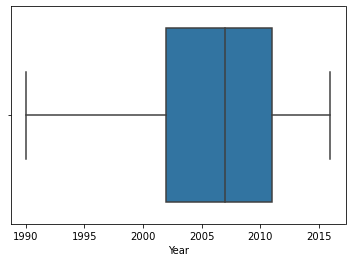

In [23]:
#now we will remove values less than 1990
df1=new_df[new_df.Year>=1990]
sns.boxplot(x=df1.Year)
#outliers are removed


In [24]:
df.Mileage.describe()

count    4345.000000
mean      161.237284
std       105.705797
min         0.000000
25%        86.000000
50%       155.000000
75%       230.000000
max       980.000000
Name: Mileage, dtype: float64

<AxesSubplot:xlabel='Mileage'>

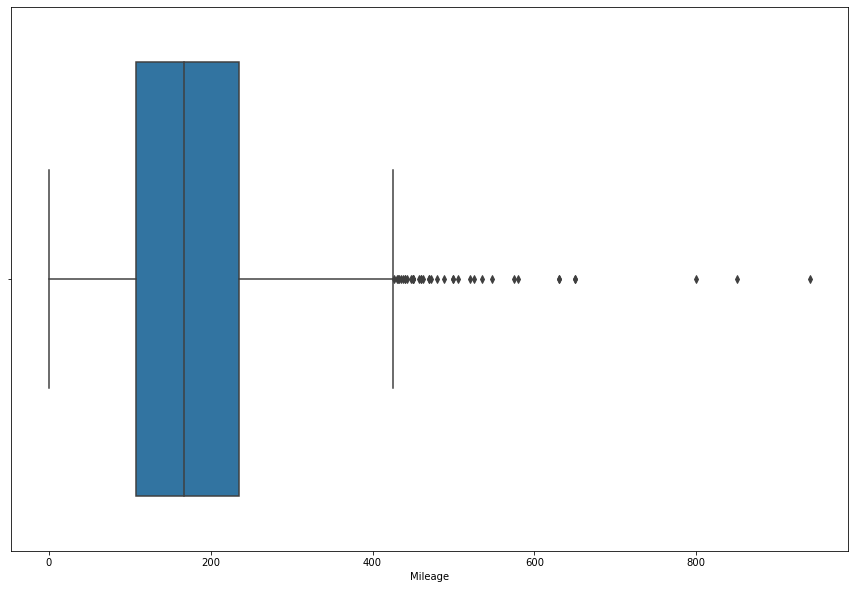

In [25]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df1.Mileage)

In [26]:
#we will remove data above 400 miles
df2=df1[df1.Mileage<=400]

<AxesSubplot:xlabel='Mileage'>

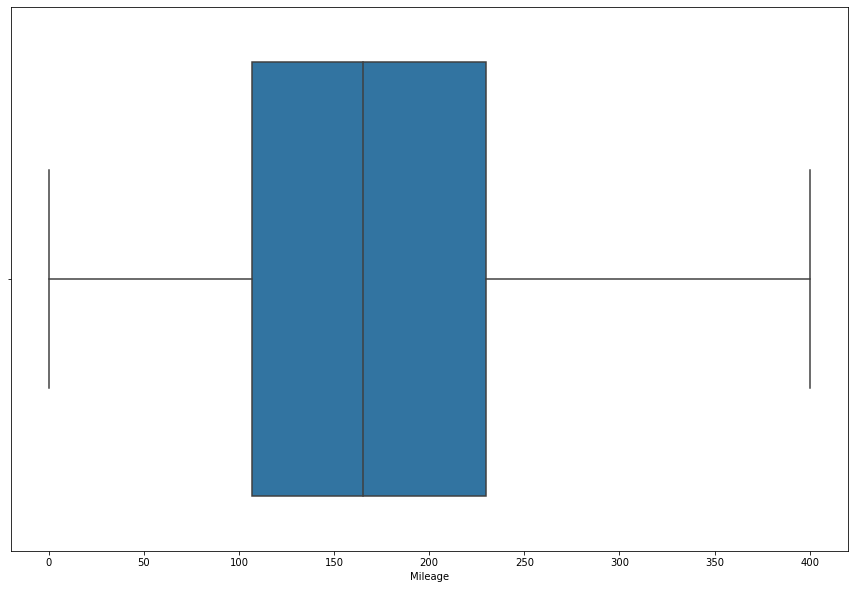

In [27]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df2.Mileage)

<AxesSubplot:xlabel='EngineV'>

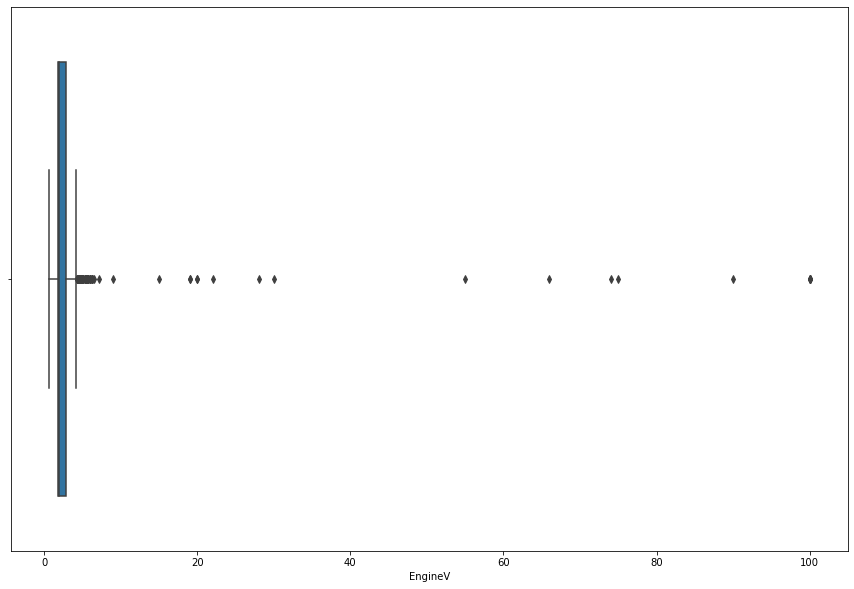

In [28]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df2.EngineV)

In [29]:
df2.EngineV.describe()

count    3511.000000
mean        2.690809
std         5.000995
min         0.600000
25%         1.800000
50%         2.000000
75%         2.800000
max        99.990000
Name: EngineV, dtype: float64

In [30]:
#this means values abouve 2.8 are outliers
df3=df2[df2.EngineV<=2.8]

<AxesSubplot:xlabel='EngineV'>

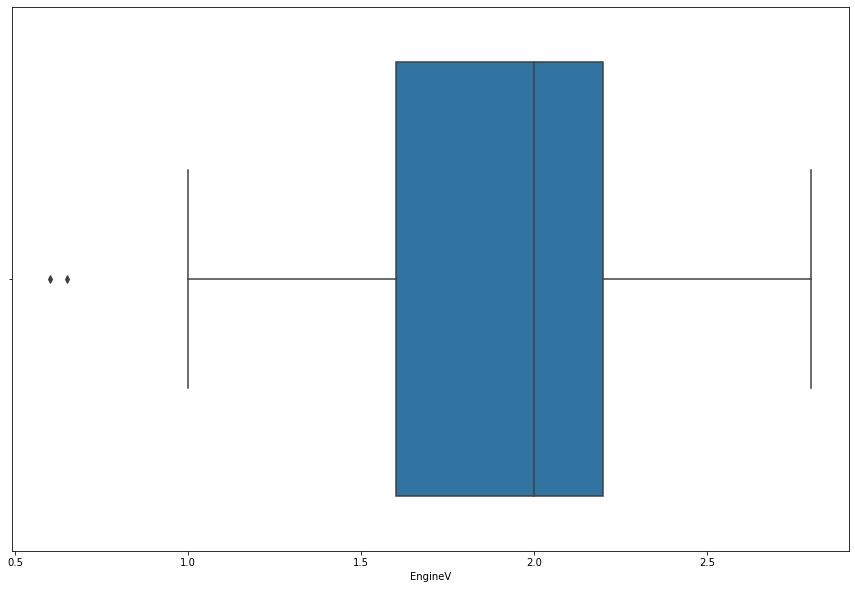

In [31]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df3.EngineV)

In [32]:
df4=df3[df3.EngineV>1.0]

<AxesSubplot:xlabel='EngineV'>

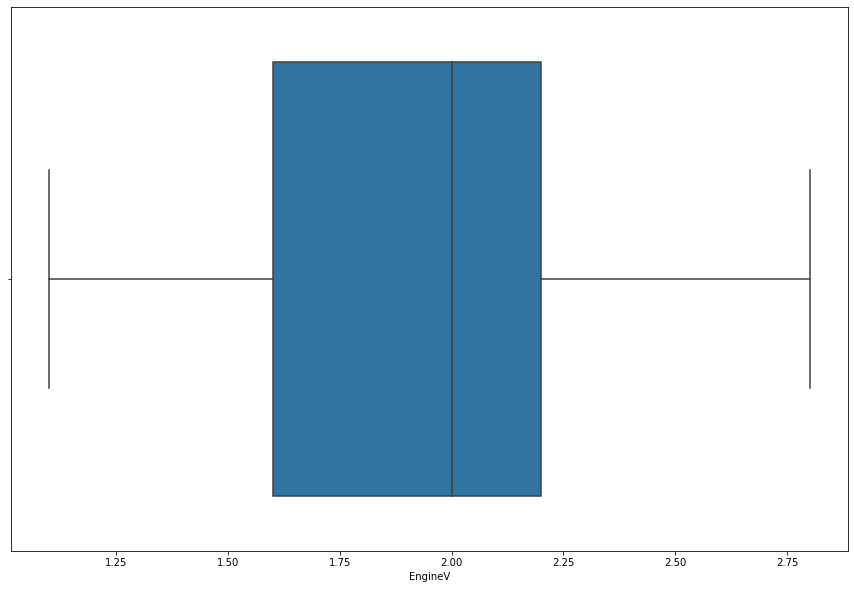

In [33]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df4.EngineV)

In [34]:
df4.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
7,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006
8,Renault,10799.0,vagon,193,1.5,Diesel,yes,2012
9,Volkswagen,1400.0,other,212,1.8,Gas,no,1999


In [35]:
df4.shape

(2632, 8)

In [36]:
#now text values changes to number suppose we will create a column for bmw so if a car is bmw then there will be 1 or 0 if its not bmw
df4.Brand.unique()

array(['BMW', 'Toyota', 'Audi', 'Renault', 'Volkswagen', 'Mitsubishi',
       'Mercedes-Benz'], dtype=object)

In [37]:
#now we will be using dummies function of pandas
df5 = pd.get_dummies(data=df4,columns=['Brand','Body','Engine Type','Registration'])

In [38]:
df5.head()

,Price,Mileage,EngineV,Year,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
0,4200.0,277,2.0,1991,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4,18300.0,120,2.0,2011,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
7,14200.0,200,2.7,2006,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
8,10799.0,193,1.5,2012,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1
9,1400.0,212,1.8,1999,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [39]:
df5.columns

Index(['Price', 'Mileage', 'EngineV', 'Year', 'Brand_Audi', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_crossover', 'Body_hatch',
       'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Diesel', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol', 'Registration_no', 'Registration_yes'],
      dtype='object')

In [41]:
#making of training and test data
#test data that data on which base we will be predicting price independent column 
#more the distance less the price so price is dependent rest other independent so we will keep indeendent variable only so we will drop x
X=df5.drop('Price',axis=1)
y=df5.Price


In [42]:
X.head()

,Mileage,EngineV,Year,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
0,277,2.0,1991,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4,120,2.0,2011,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
7,200,2.7,2006,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
8,193,1.5,2012,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
9,212,1.8,1999,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0


In [43]:
X.columns

Index(['Mileage', 'EngineV', 'Year', 'Brand_Audi', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_crossover', 'Body_hatch',
       'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Diesel', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol', 'Registration_no', 'Registration_yes'],
      dtype='object')

In [44]:
y.head()#now are dependednt and independent varibles are seperated

0     4200.0
4    18300.0
7    14200.0
8    10799.0
9     1400.0
Name: Price, dtype: float64

In [45]:
#preparing of training and test data
from sklearn.model_selection import train_test_split#importing split function

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=15)#x has independent variable y has dependent 

In [47]:
X_train.shape#80 percent data test data

(2105, 22)

In [48]:
X_test.shape#20 percent test data

(527, 22)

In [49]:
from sklearn.linear_model import LinearRegression#starting training 

In [50]:
model=LinearRegression()
model.fit(X_train,y_train)#here our model is trained

LinearRegression()

In [51]:
model.score(X_test,y_test)#score through linear regression

0.7243633367983073

In [53]:
#using decision tree regression
from sklearn.tree import DecisionTreeRegressor

In [55]:
DTR=DecisionTreeRegressor(random_state=15)
DTR.fit(X_train,y_train)

DecisionTreeRegressor(random_state=15)

In [56]:
DTR.score(X_test,y_test)

0.7817059998843527

In [58]:
from sklearn.ensemble import RandomForestRegressor
ran_for=RandomForestRegressor(random_state=15)
ran_for.fit(X_train,y_train)

RandomForestRegressor(random_state=15)

In [59]:
ran_for.score(X_test,y_test)

0.8723566475994855

In [60]:
X_test.head()

,Mileage,EngineV,Year,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
2427,180,2.0,2008,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3604,83,1.6,2008,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1
321,240,1.8,2002,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,1
1413,1,2.0,2015,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1349,250,2.5,2000,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [61]:
y_test.head()

2427     7600.0
3604    10100.0
321      7500.0
1413    27200.0
1349     2500.0
Name: Price, dtype: float64

In [63]:
predicted_price=ran_for.predict(X_test)
predicted_price[:5]

array([ 9235.98  ,  9350.5   ,  7185.99  , 31176.2414,  2761.8   ])